### Dimensionality reduction (PCA, tSNE)
### https://www.kaggle.com/tilii7/dimensionality-reduction-pca-tsne

In [1]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    import matplotlib.cm as cm
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE

In [33]:
# All values (Categorical also in numeric) in Numeric in this dataset

print('\nLoading files ...')
train = pd.read_csv('Data/dimensionality_reduction_pca_tsne/train.csv')
test = pd.read_csv('Data/dimensionality_reduction_pca_tsne/test.csv')
X = train.drop(['id', 'target'], axis=1).values
y = train['target'].values.astype(np.int8)

target_names = np.unique(y)
freq_target = train['target'].value_counts()/len(y)
    
print('\nThere are %d unique target valuess in this dataset:' % (len(target_names)), target_names)
print('\nfrequency of Target values: ',freq_target)


Loading files ...

There are 2 unique target valuess in this dataset: [0 1]

frequency of Target values:  0    0.963552
1    0.036448
Name: target, dtype: float64


In [34]:
# Principal Component Analysis (PCA) identifies the combination of components (directions in the feature space) that account for the most variance in the data

n_comp = 20
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 0.9944
Individual variance contributions:
0.9077327018849173
0.02542340632150171
0.011033728952072632
0.007026875356199497
0.006283416003140639
0.0061197477292358315
0.005358647266808234
0.004532740198131307
0.0036293073197562428
0.0029426228826478665
0.002392460121441058
0.0017746433023195635
0.00166653490751758
0.0015118573722780204
0.0014828537818274484
0.0012950139999157201
0.0012052148134726218
0.001072763106198474
0.001039529063489959
0.0008415527677793378


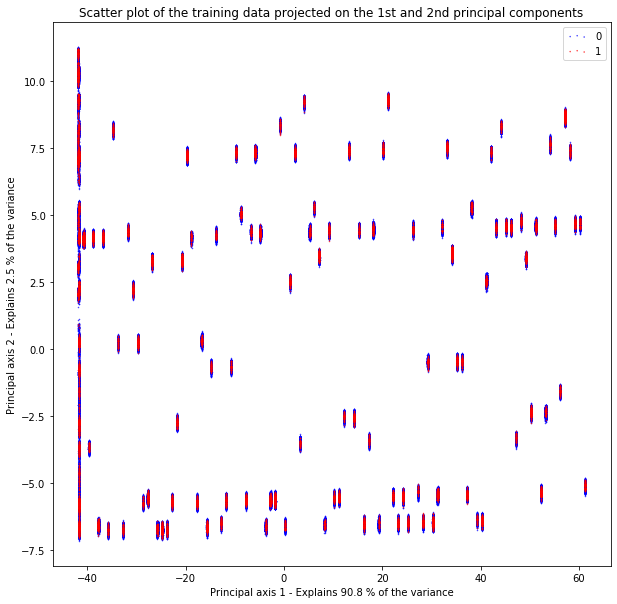

In [35]:
colors = ['blue', 'red']
plt.figure(1, figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

plt.savefig('pca-porto-01.png', dpi=150)
plt.show()

In [ ]:
#Let's encode the categorical variables and try again.

In [36]:
from sklearn.preprocessing import MinMaxScaler

def scale_data(X, scaler=None):
    if not scaler:
        scaler = MinMaxScaler(feature_range=(-1, 1))
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

X = train.drop(['id', 'target'], axis=1)
test.drop(['id'], axis=1, inplace=True)
n_train = X.shape[0]
train_test = pd.concat((X, test)).reset_index(drop=True)
col_to_drop = X.columns[X.columns.str.endswith('_cat')]
col_to_dummify = X.columns[X.columns.str.endswith('_cat')].astype(str).tolist()

for col in col_to_dummify:
    dummy = pd.get_dummies(train_test[col].astype('category'))
    columns = dummy.columns.astype(str).tolist()
    columns = [col + '_' + w for w in columns]
    dummy.columns = columns
    train_test = pd.concat((train_test, dummy), axis=1)

train_test.drop(col_to_dummify, axis=1, inplace=True)
train_test_scaled, scaler = scale_data(train_test)
X = np.array(train_test_scaled[:n_train, :])
test = np.array(train_test_scaled[n_train:, :])
print('\n Shape of processed train data:', X.shape)
print(' Shape of processed test data:', test.shape)



 Shape of processed train data: (595212, 227)
 Shape of processed test data: (892816, 227)



Running PCA again ...
Explained variance: 0.6231
Individual variance contributions:
0.0740840701009599
0.061886820363098394
0.055953951179621625
0.04276076114184746
0.035908604887871044
0.034570725030749455
0.031465850058335174
0.028558207829279102
0.025510902898918275
0.025250688029507973
0.02458278862531804
0.024140032207526193
0.02386427691915576
0.02321140660229256
0.02103511418696042
0.020913502896378444
0.02006497744898943
0.0189478800072718
0.01625071184094955
0.014169058538981821


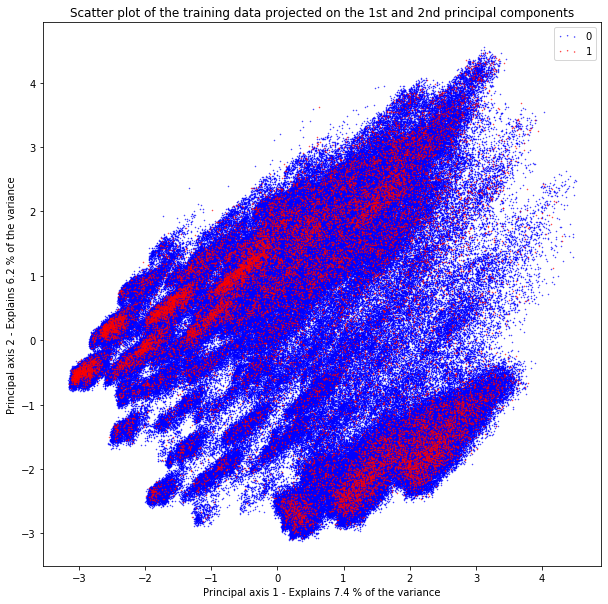

In [37]:
print('\nRunning PCA again ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])

plt.figure(1, figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

plt.savefig('pca-porto-02.png', dpi=150)
plt.show()